## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [6]:
diabetes_data['Glucose'] = diabetes_data['Glucose'].replace(0, np.nan)
diabetes_data['BloodPressure'] = diabetes_data['BloodPressure'].replace(0, np.nan)
diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].replace(0, np.nan)
diabetes_data['Insulin'] = diabetes_data['Insulin'].replace(0, np.nan)
diabetes_data['BMI'] = diabetes_data['BMI'].replace(0, np.nan)

In [7]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

array([[<AxesSubplot:title={'center':'Pregnancies'}>]], dtype=object)

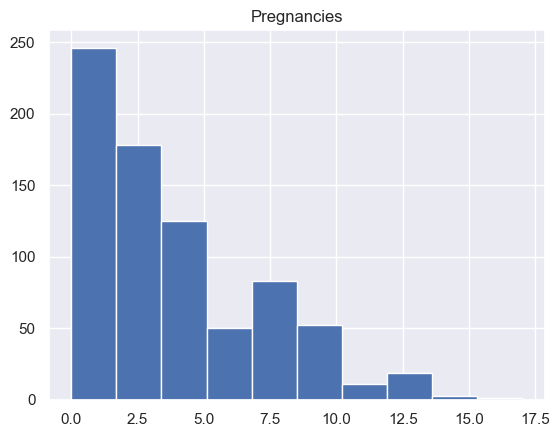

In [8]:
diabetes_data.hist(column='Pregnancies')

In [9]:
diabetes_data.hist(column='Glucose')

array([[<AxesSubplot:title={'center':'Glucose'}>]], dtype=object)

In [10]:
diabetes_data.hist(column='BloodPressure')

array([[<AxesSubplot:title={'center':'BloodPressure'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'SkinThickness'}>]], dtype=object)

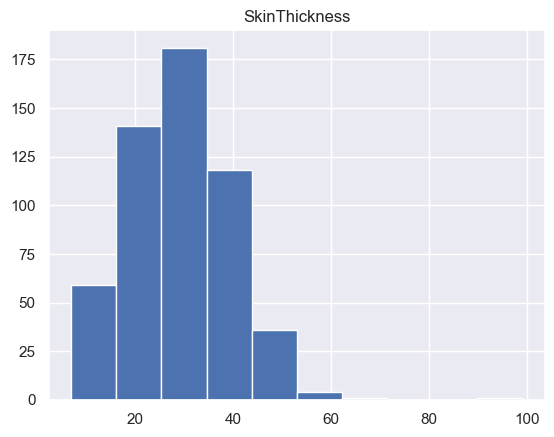

In [11]:
diabetes_data.hist(column='SkinThickness')

In [12]:
diabetes_data.hist(column='Insulin')

array([[<AxesSubplot:title={'center':'Insulin'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'BMI'}>]], dtype=object)

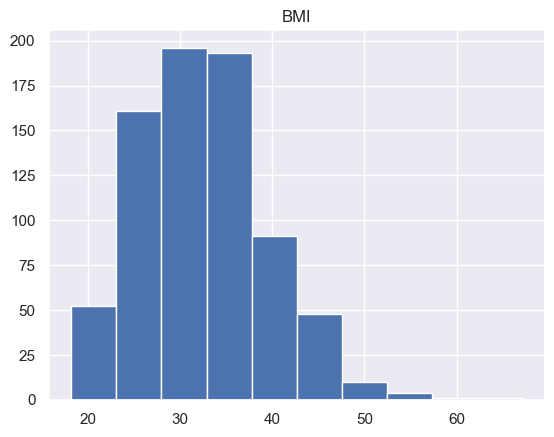

In [13]:
diabetes_data.hist(column='BMI')

array([[<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>]],
      dtype=object)

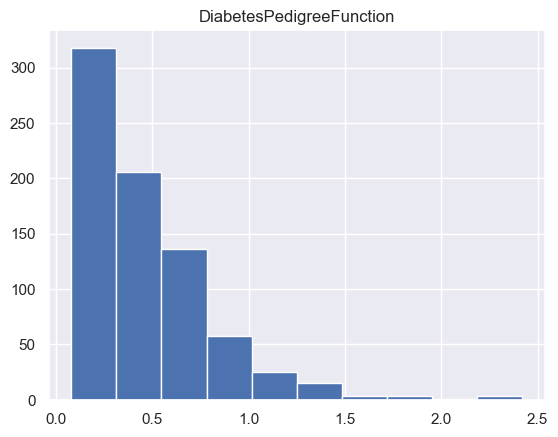

In [14]:
diabetes_data.hist(column='DiabetesPedigreeFunction')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

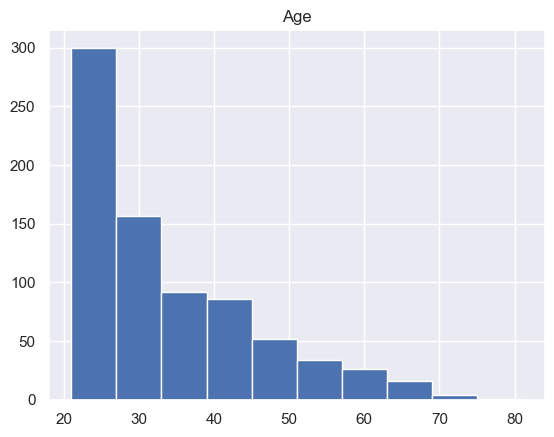

In [15]:
diabetes_data.hist(column='Age')

array([[<AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

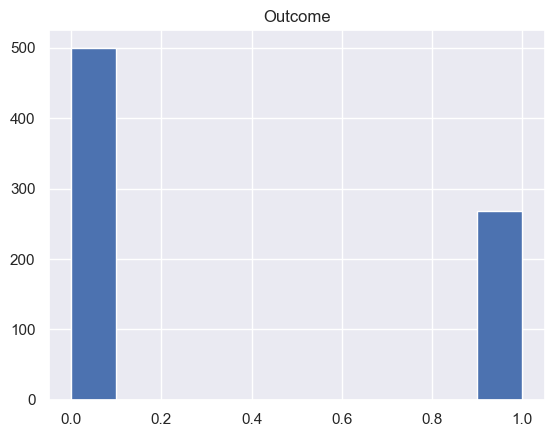

In [16]:
diabetes_data.hist(column='Outcome')

#### Replace the zeros with mean and median values.

In [17]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [18]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

array([[<AxesSubplot:title={'center':'Pregnancies'}>]], dtype=object)

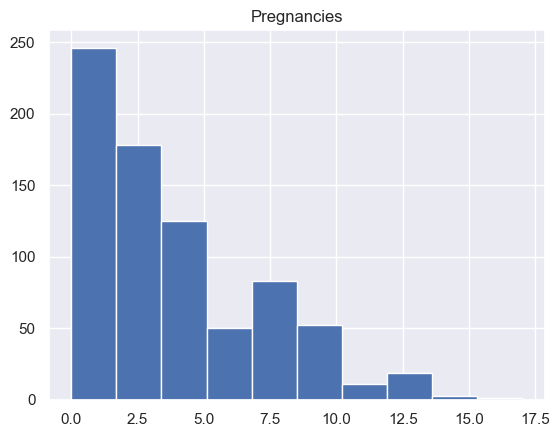

In [19]:
diabetes_data.hist(column='Pregnancies')

array([[<AxesSubplot:title={'center':'Glucose'}>]], dtype=object)

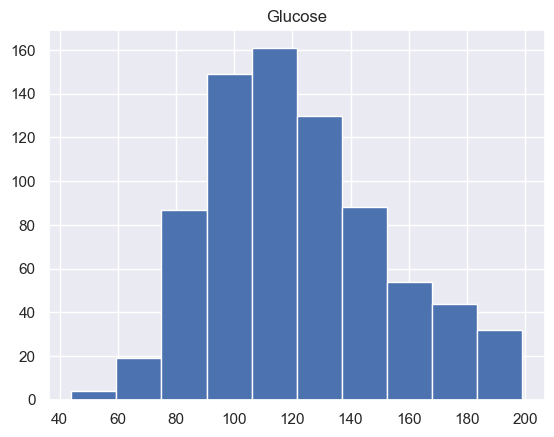

In [20]:
diabetes_data.hist(column='Glucose')

In [21]:
diabetes_data.hist(column='BloodPressure')

array([[<AxesSubplot:title={'center':'BloodPressure'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'SkinThickness'}>]], dtype=object)

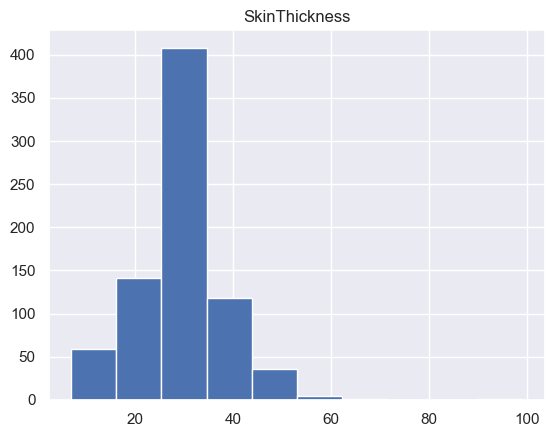

In [22]:
diabetes_data.hist(column='SkinThickness')

In [23]:
diabetes_data.hist(column='Insulin')

array([[<AxesSubplot:title={'center':'Insulin'}>]], dtype=object)

In [24]:
diabetes_data.hist(column='BMI')

array([[<AxesSubplot:title={'center':'BMI'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>]],
      dtype=object)

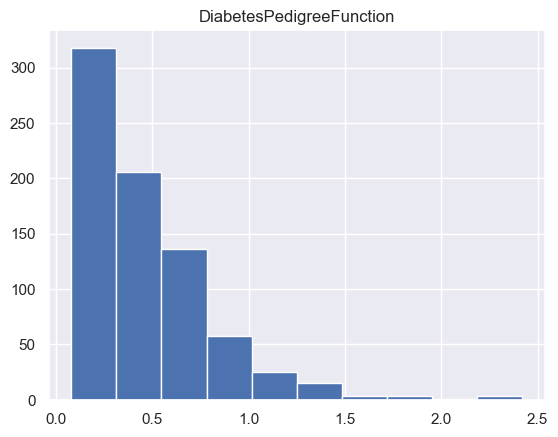

In [25]:
diabetes_data.hist(column='DiabetesPedigreeFunction')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

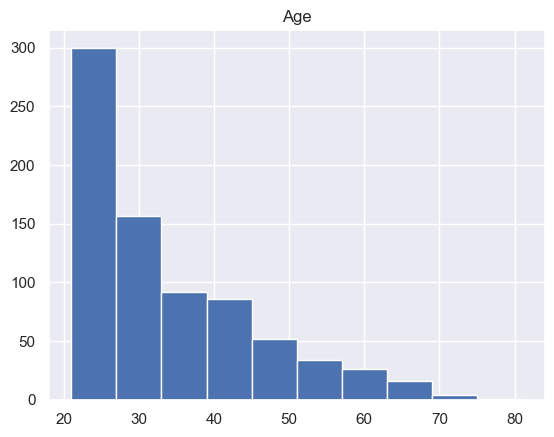

In [26]:
diabetes_data.hist(column='Age')

array([[<AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

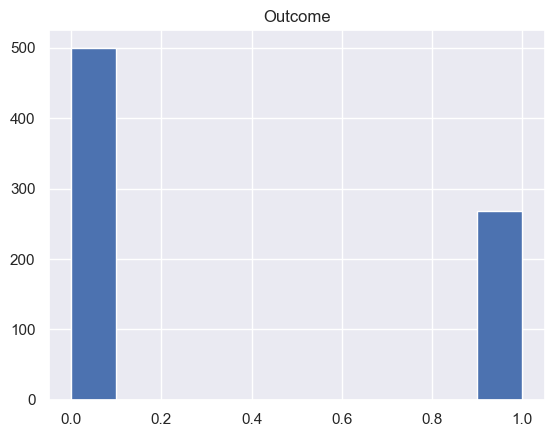

In [27]:
diabetes_data.hist(column='Outcome')

#### Plot the correlation matrix heatmap

Correlation between various features


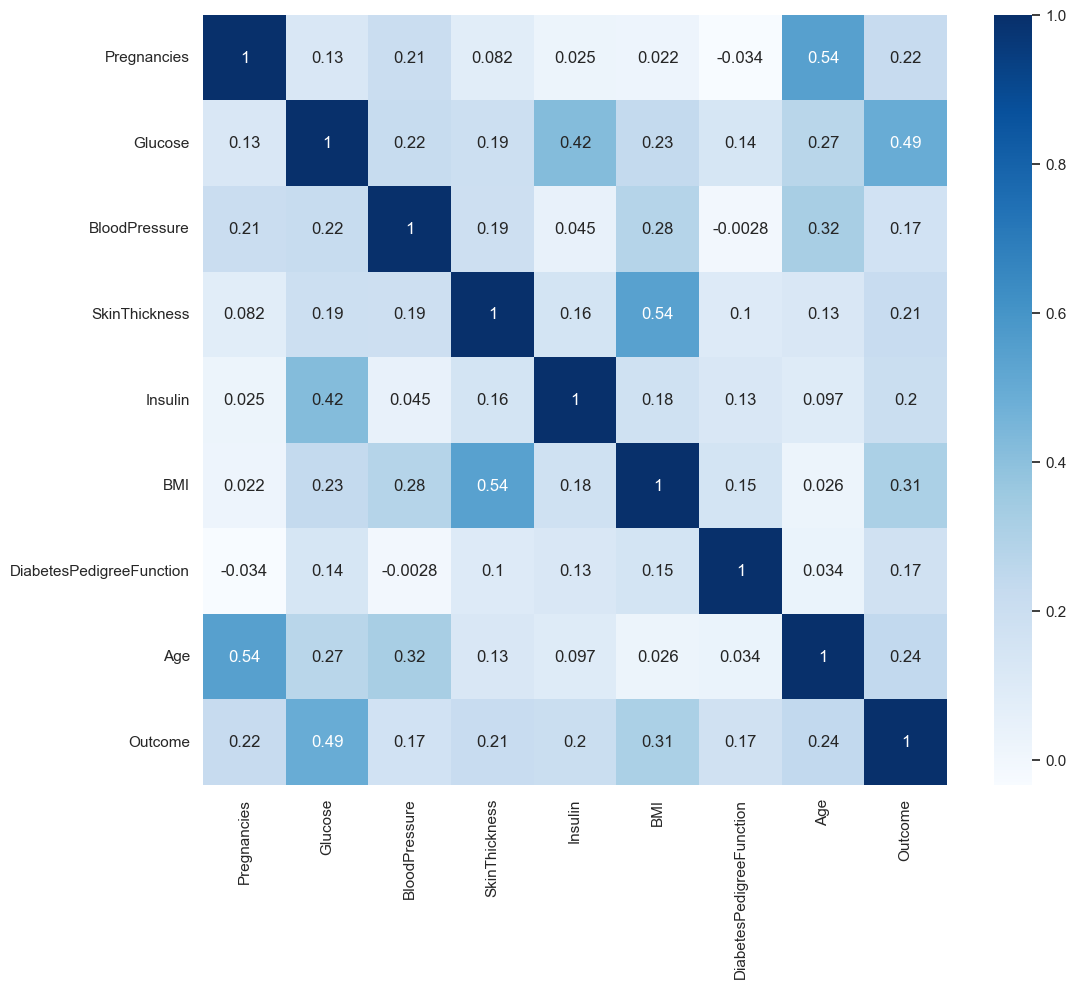

In [28]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [29]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [30]:
y= diabetes_data['Outcome']
X = diabetes_data.copy()
X.drop('Outcome', axis= 1, inplace=True)



**<font color='teal'> Create a 70/30 train and test split. </font>**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                train_size = 0.70,
                                                random_state = 42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scaler.fit(X_train)
X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)

In [32]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [33]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [34]:
print(train_scores, test_scores)

[1.0, 0.851024208566108, 0.8547486033519553, 0.8417132216014898, 0.839851024208566, 0.8230912476722533, 0.8342644320297952, 0.8212290502793296, 0.8268156424581006] [0.6666666666666666, 0.670995670995671, 0.670995670995671, 0.6926406926406926, 0.7012987012987013, 0.683982683982684, 0.7316017316017316, 0.7359307359307359, 0.7316017316017316]


In [35]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1,10), test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

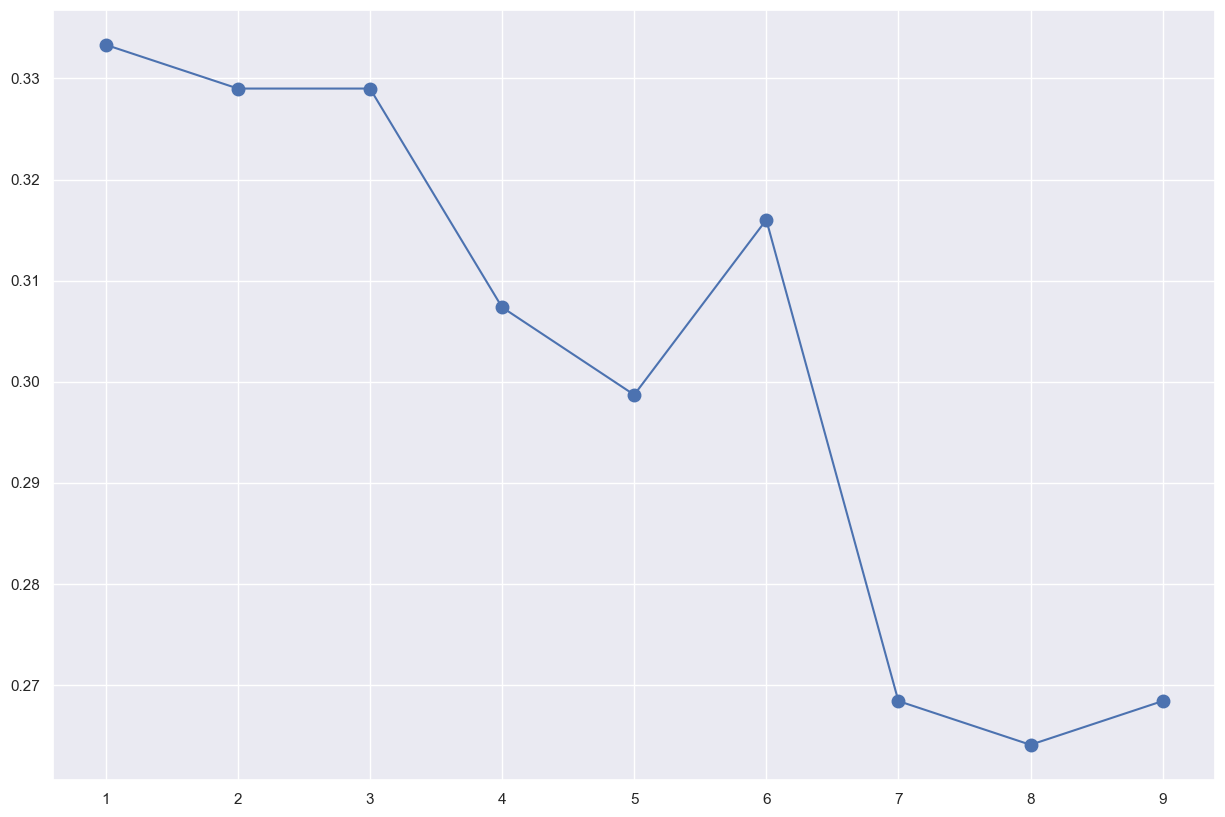

In [36]:
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,10),error_rate, marker='o', markersize=9)

In [37]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,10)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

In [38]:
print(scores)

[0.6875901875901875, 0.7136236312706901, 0.7331296154825566, 0.7369663016721841, 0.7344113402936931, 0.7370002546473134, 0.746099651982005, 0.7487055428231899, 0.7539597657244715]


In [39]:
best_score = -1
for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = i

In [40]:
print(best_k)

8


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [41]:
best_k = np.argmax(train_scores) + 1

In [42]:
print(best_k)

1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [43]:
best_k = np.argmax(test_scores) + 1
print(best_k)

8


Plot the train and test model performance by number of neighbors.

C:\Users\charr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\charr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


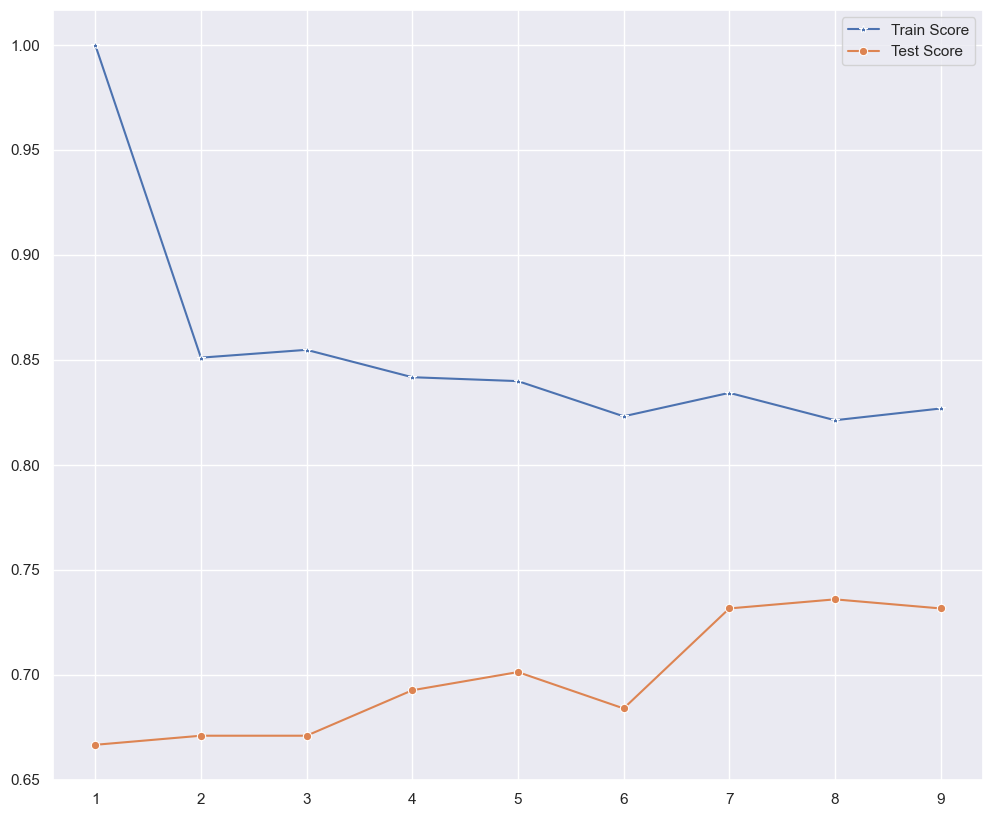

In [44]:
plt.figure(figsize=(12,10))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [45]:
knn = KNeighborsClassifier(8)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7359307359307359

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

[[126  25]
 [ 36  44]]


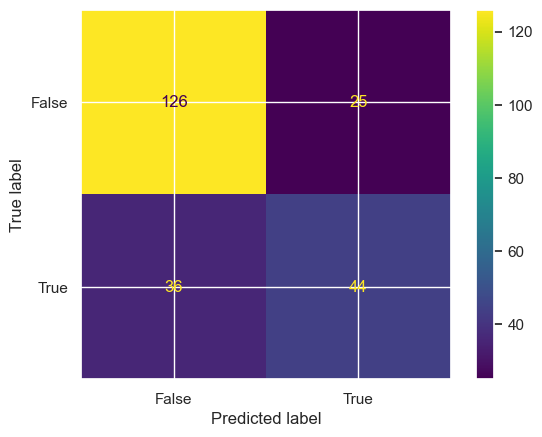

In [47]:
print(pl)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = pl, display_labels = [False, True])

cm_display.plot()
plt.show()

**<font color='teal'> Print the classification report </font>**

In [48]:
    print(classification_report(y_test, y_pred, target_names=['Non Diabetic (0)', 'Diabetic (1)']))

                  precision    recall  f1-score   support

Non Diabetic (0)       0.78      0.83      0.81       151
    Diabetic (1)       0.64      0.55      0.59        80

        accuracy                           0.74       231
       macro avg       0.71      0.69      0.70       231
    weighted avg       0.73      0.74      0.73       231



The model trained and applied to the test data shows approximately 74%.

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [50]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In the Random Forest model, the optimal number of estimators is 64 based on the search performed.

In [51]:
from sklearn.ensemble import RandomForestClassifier

#Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
criterion = ['gini', 'entropy']
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, criterion=criterion)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
clf = grid.fit(X_train, y_train)


model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.745
Random Forest: f1-score=0.744


In [52]:
# Summarize the results in a readable format
print("Best: {0}, using {1}".format(clf.cv_results_['mean_test_score'], clf.best_params_))
results_df = pd.DataFrame(clf.cv_results_)
results_df

Best: [0.73738318 0.75415369 0.74671166 0.76902042 0.76154379 0.7615784
 0.77281066 0.76344756 0.7709242  0.74859813 0.74299065 0.75235376
 0.76339564 0.75408446 0.75410177 0.76720318 0.77088958 0.76336102], using {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 64}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.130833      0.000741         0.011380        0.000492   
1        0.259762      0.000747         0.021278        0.000433   
2        0.520820      0.004914         0.041490        0.000500   
3        0.151249      0.002687         0.013093        0.001982   
4        0.299254      0.001098         0.022539        0.000489   
5        0.600620      0.007144         0.045079        0.000978   
6        0.156973      0.002997         0.011998        0.000060   
7        0.311468      0.006836         0.023472        0.000452   
8        0.612862      0.002559         0.044807        0.000127   
9        0.134640      0.002613         0.011562        0.000497   
10       0.266253      0.000578         0.022145        0.001465   
11       0.539509      0.020098         0.041409        0.000439   
12       0.161124      0.000807         0.011980        0.000043   
13       0.319499      0.001033         0.022538        0.000488   
14       0.638675      0.003487         0.044280        0.000489   
15       0.169220      0.001037         0.012174        0.000736   
16       0.981636      0.595547         0.195689        0.142581   
17       1.009524      0.355349         0.051412        0.008716   

   param_criterion param_max_depth param_n_estimators  \
0             gini               2                 64   
1             gini               2                128   
2             gini               2                256   
3             gini               8                 64   
4             gini               8                128   
5             gini               8                256   
6             gini              16                 64   
7             gini              16                128   
8             gini              16                256   
9          entropy               2                 64   
10         entropy               2                128   
11         entropy               2                256   
12         entropy               8                 64   
13         entropy               8                128   
14         entropy               8                256   
15         entropy              16                 64   
16         entropy              16                128   
17         entropy              16                256   

                                               params  split0_test_score  \
0   {'criterion': 'gini', 'max_depth': 2, 'n_estim...           0.768519   
1   {'criterion': 'gini', 'max_depth': 2, 'n_estim...           0.777778   
2   {'criterion': 'gini', 'max_depth': 2, 'n_estim...           0.777778   
3   {'criterion': 'gini', 'max_depth': 8, 'n_estim...           0.824074   
4   {'criterion': 'gini', 'max_depth': 8, 'n_estim...           0.805556   
5   {'criterion': 'gini', 'max_depth': 8, 'n_estim...           0.777778   
6   {'criterion': 'gini', 'max_depth': 16, 'n_esti...           0.777778   
7   {'criterion': 'gini', 'max_depth': 16, 'n_esti...           0.787037   
8   {'criterion': 'gini', 'max_depth': 16, 'n_esti...           0.787037   
9   {'criterion': 'entropy', 'max_depth': 2, 'n_es...           0.777778   
10  {'criterion': 'entropy', 'max_depth': 2, 'n_es...           0.759259   
11  {'criterion': 'entropy', 'max_depth': 2, 'n_es...           0.768519   
12  {'criterion': 'entropy', 'max_depth': 8, 'n_es...           0.805556   
13  {'criterion': 'entropy', 'max_depth': 8, 'n_es...           0.796296   
14  {'criterion': 'entropy', 'max_depth': 8, 'n_es...           0.796296   
15  {'criterion': 'entropy', 'max_depth': 16, 'n_e...           0.777778   
16  {'criterion': 'entropy', 'max_depth': 16, 'n_e...           0.805556   
17  {'criterion': 'entropy', 'max_depth': 16, 'n_e...           0.796296   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.731481           0.728972           0.700935   
1            0.750000           0.775701           0.719